<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/Hybrid_CNN_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm, trange
import glob
import os, sys
import time
import PIL
import PIL.Image
############ colors ##############
def Red(prt): print("\033[91m {}\033[00m" .format(prt))
def Green(prt): print("\033[92m {}\033[00m" .format(prt))
def Yellow(prt): print("\033[93m {}\033[00m" .format(prt))
#############################################
d = dict(file=sys.stdout,colour='green')
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
#plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm
plt.style.use('seaborn-whitegrid')
import matplotlib
plt.style.use('seaborn-whitegrid')
#warnings.filterwarnings("ignore") #Ignore the outputed warnings
#from tensorflow import keras 
import sklearn
import keras as ks
from sklearn.metrics import roc_curve
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,Input,concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import TensorBoard
from numpy.random import permutation
import pandas as pd
from IPython.display import Math, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import  label_binarize, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import auc
import seaborn as sns


In [ ]:
###### DNN model with inputs=(9,)###############
inputA = Input(shape=(28,28,1))
x = tf.keras.layers.Flatten(input_shape=(28,28,1))(inputA)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
x = Model(inputs=inputA, outputs=x)

###### CNN model with inputs=(50,50,1)###############
v1 = Input(shape=(28,28,1))
y = Conv2D(16, (5, 5),padding='same',  strides=1, activation='relu')(v1)
y = Conv2D(16, (5, 5), padding='same',  strides=1,activation='relu')(y)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.2)(y)

y = Conv2D(32, (3, 3),padding='same',  strides=1, activation='relu')(y)
y = Conv2D(32, (3, 3), padding='same',  strides=1,activation='relu')(y)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.2)(y)

y = Conv2D(64, (2, 2),padding='same',  strides=1, activation='relu')(y)
y = Conv2D(64, (2, 2), padding='same',  strides=1,activation='relu')(y)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(64, activation=None)(y)
y= Model(inputs=v1, outputs=y)
# combine the output of the two branches
combined = concatenate([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(64, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)
######
model = Model(inputs=[x.input, y.input], outputs=z)

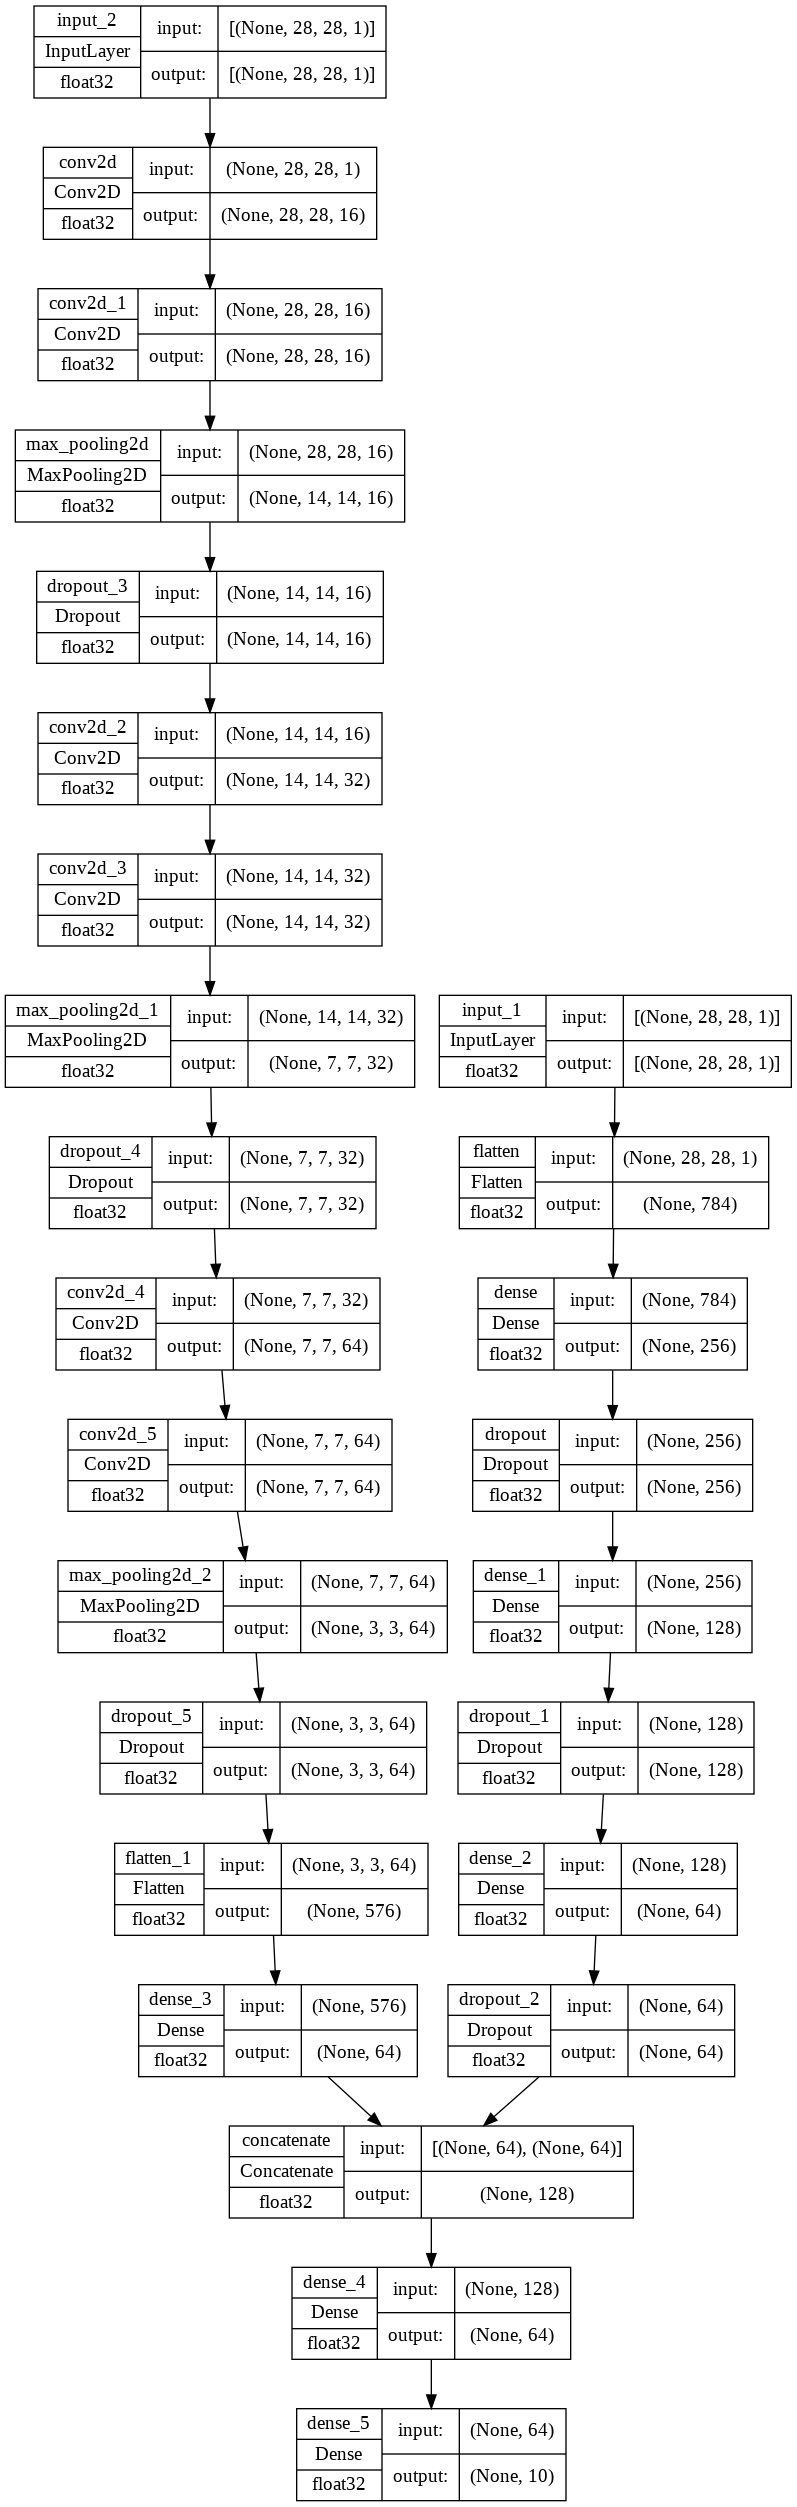

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=True)

In [ ]:
from keras.datasets import mnist
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xc_train = x_train[:30000]
yc_train = y_train[:30000]
xc_test = x_test[:5000]
yc_test = y_test[:5000]

xd_train = x_train[30000:]
yd_train = y_train[30000:]
xd_test = x_test[5000:]
yd_test = y_test[5000:]

In [ ]:
xc_train=xc_train.reshape(-1,28,28,1)/255;
xc_test=xc_test.reshape(-1,28,28,1)/255;
xd_train=xd_train.reshape(-1,28,28,1)/255;
xd_test=xd_test.reshape(-1,28,28,1)/255;

In [ ]:
yc_train1=tf.keras.utils.to_categorical(yc_train,10)
yc_test1=tf.keras.utils.to_categorical(yc_test,10)
yd_train1=tf.keras.utils.to_categorical(yd_train,10)
yd_test1=tf.keras.utils.to_categorical(yd_test,10)

In [ ]:
YY_train = np.concatenate([yd_train1,yc_train1],axis=0)
YY_test = np.concatenate([yd_test1,yc_test1],axis=0)

In [ ]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit([xd_train,xc_train],YY_train , batch_size=500, epochs=20, validation_split=0.2, shuffle=True,verbose=1)


Epoch 1/20
48/48 [==============================] - 2s 30ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0917 - val_accuracy: 0.9765
Epoch 2/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.1057 - val_accuracy: 0.9768
Epoch 3/20
48/48 [==============================] - 1s 24ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0963 - val_accuracy: 0.9778
Epoch 4/20
48/48 [==============================] - 1s 24ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.1006 - val_accuracy: 0.9773
Epoch 5/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.1040 - val_accuracy: 0.9785
Epoch 6/20
48/48 [==============================] - 1s 22ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.1121 - val_accuracy: 0.9762
Epoch 7/20
48/48 [==============================] - 1s 24ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.1153 - val_accuracy: 0.9743
Epoch 8/20
48

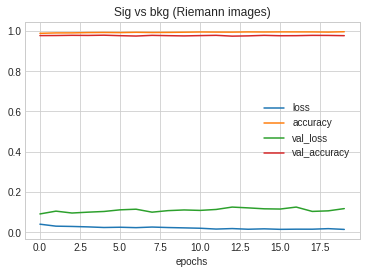

In [ ]:
pd.DataFrame(history.history).plot(xlabel='epochs',title='Sig vs bkg (Riemann images)');


In [ ]:
model.evaluate([xd_test[:2000],xc_test[:2000]], YY_test[:2000], verbose=0)

[0.10037365555763245, 0.9794999957084656]